**LOADING LIBRARY**

In [50]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot
from pylab import rcParams
import seaborn as sns
import matplotlib.pyplot as plt

**LOADING DATASET**

In [51]:
df = pd.read_csv('./onemonth_nodeload5.csv')
print(df.head(5))
print(df.tail(5))

                    ds     y
0  14/05/2024 04:37:05  2.90
1  14/05/2024 04:37:10  2.90
2  14/05/2024 04:37:15  2.95
3  14/05/2024 04:37:20  2.95
4  14/05/2024 04:37:25  2.95
                         ds     y
526528  13/06/2024 23:59:40  2.53
526529  13/06/2024 23:59:45  2.56
526530  13/06/2024 23:59:50  2.56
526531  13/06/2024 23:59:55  2.56
526532  14/06/2024 00:00:00  2.56


**DATASET DATA TYPES**

In [52]:
print(df.dtypes)

ds     object
y     float64
dtype: object


**DATASET INFO/FIVE-POINT SUMMARY**

In [53]:
print(df.describe())

                   y
count  526533.000000
mean        4.342593
std         2.204463
min         0.860000
25%         2.210000
50%         4.640000
75%         5.990000
max        12.990000


**CHECKING FOR DUPLICATE TIMESTAMP**

In [55]:
df.duplicated(subset=['ds'])

0         False
1         False
2         False
3         False
4         False
          ...  
526528    False
526529    False
526530    False
526531    False
526532    False
Length: 526533, dtype: bool

**CHANGE TIMESTAMP TO DATETIME FORMAT**

In [56]:
df.ds = pd.to_datetime(df.ds)
print(df.dtypes)

ds    datetime64[ns]
y            float64
dtype: object


/tmp/ipykernel_194917/919117055.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df.ds = pd.to_datetime(df.ds)


**CHANGING INDEX TO TIMESTAMP COLUMN**

In [40]:
df.set_index("ds",drop=True, inplace=True)
print(df.head(5))

                        y
ds                       
2024-05-14 04:37:05  2.90
2024-05-14 04:37:10  2.90
2024-05-14 04:37:15  2.95
2024-05-14 04:37:20  2.95
2024-05-14 04:37:25  2.95


**CHECKING FOR NaN VALUES**

In [58]:
check_nan = df['y'].isnull().values.any()
check_nan

False

**DATASET PLOTS**

<Axes: xlabel='ds', ylabel='y'>

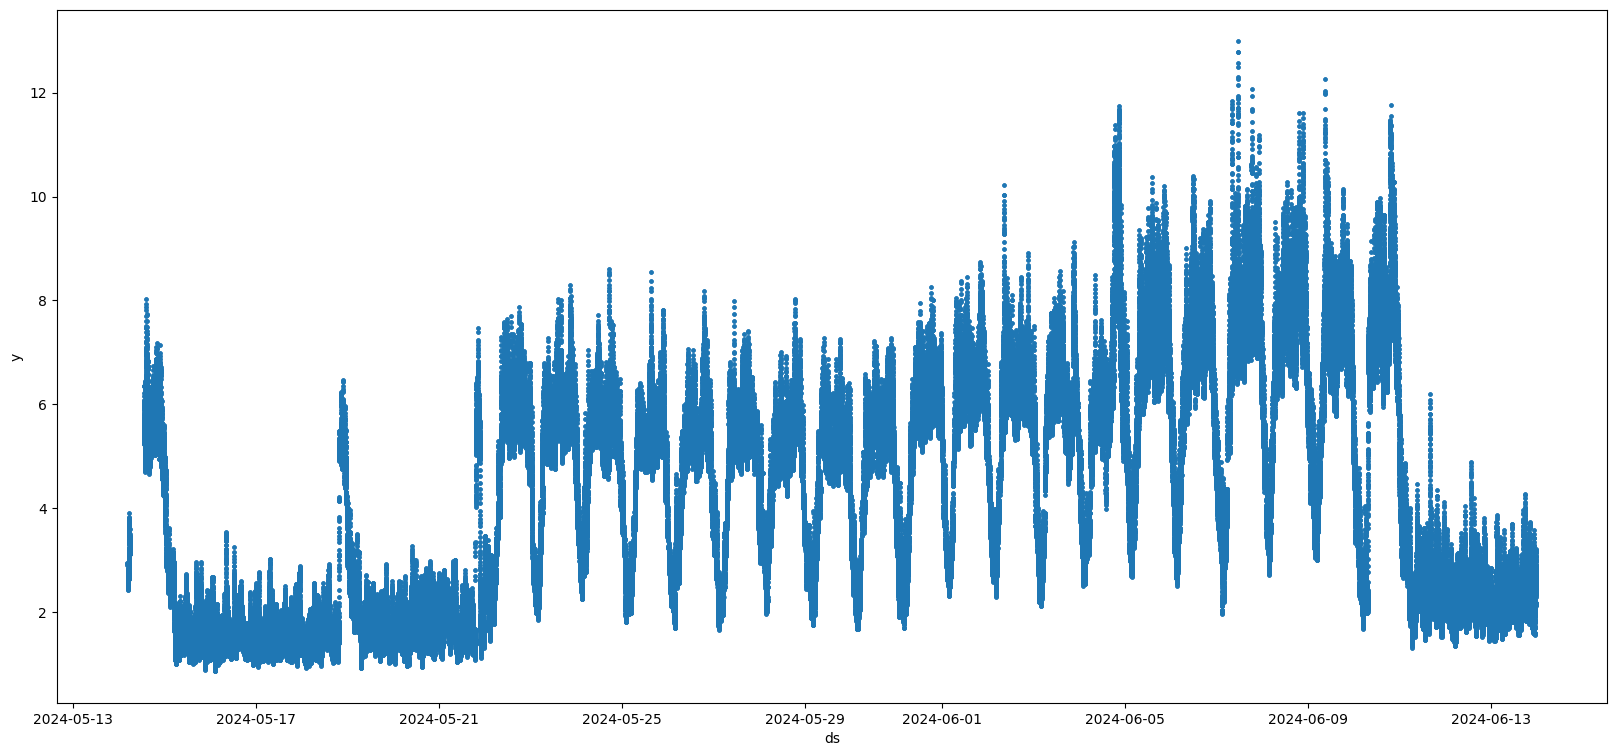

In [73]:
import seaborn as sns
df.plot.scatter(x='ds', y='y', marker='.', figsize=(20, 9))

**FINDING IQR,LOWER LIMIT AND UPPER LIMIT**

In [74]:

import numpy as np
q3, q1 = np.percentile(df['y'],[75,25])
iqr = q3-q1

upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

print(f"iqr : {iqr}")
print(f"upper limit : {upper_limit}")
print(f"lower limit : {lower_limit}")

iqr : 3.7800000000000002
upper limit : 11.66
lower limit : -3.46


**FINDING OUTLIERS**

In [75]:
df[df['y']>upper_limit].count()

ds    62
y     62
dtype: int64

**TRIMMING / REMOVING OUTLIERS**

In [83]:
new_df = df[df['y'] <upper_limit]
new_df.set_index("ds",drop=True, inplace=True)
print(new_df.describe())

                   y
count  526471.000000
mean        4.341689
std         2.203016
min         0.860000
25%         2.210000
50%         4.640000
75%         5.990000
max        11.640000


**BOX-PLOT & HIST-PLOT BEFORE/AFTER REMOVING OUTLIER**

<Axes: ylabel='y'>

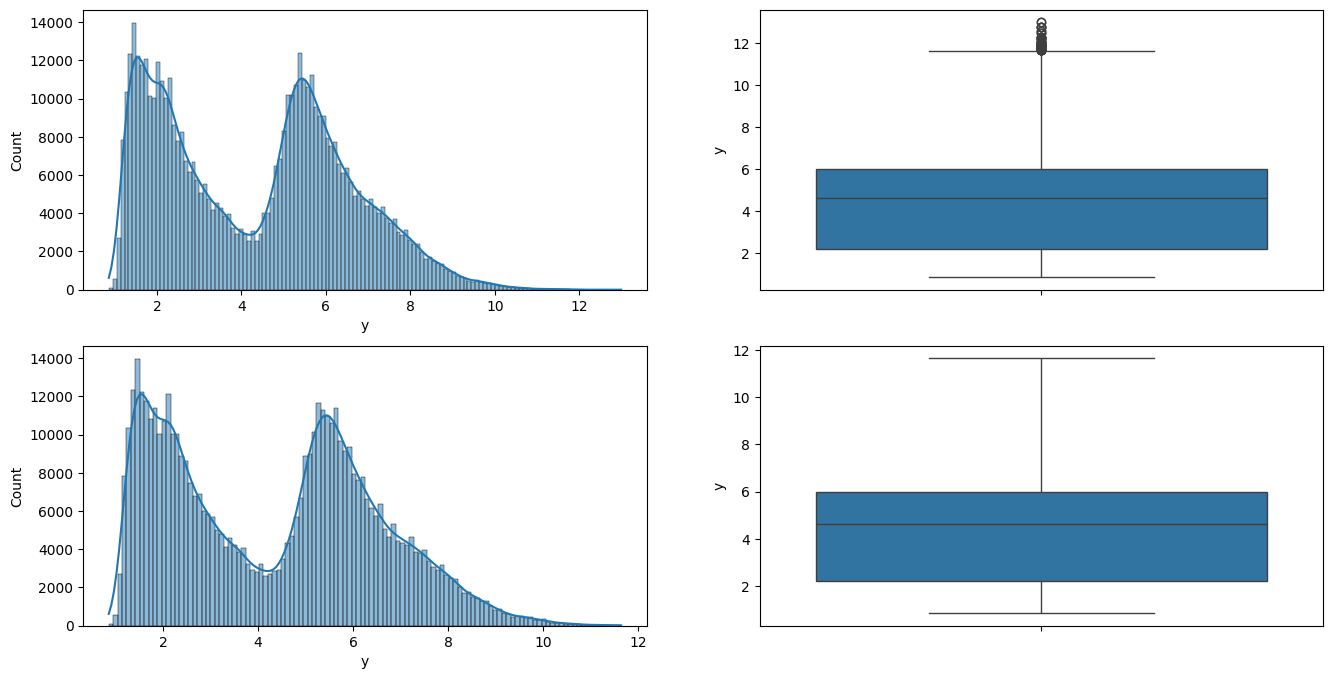

In [84]:
plt.figure(figsize = (16,8))

plt.subplot(2,2,1)
sns.histplot(df['y'], kde=True)
plt.subplot(2,2,2)
sns.boxplot(data = df['y'])

plt.subplot(2,2,3)
sns.histplot(new_df['y'], kde=True)
plt.subplot(2,2,4)
sns.boxplot(data = new_df['y'])

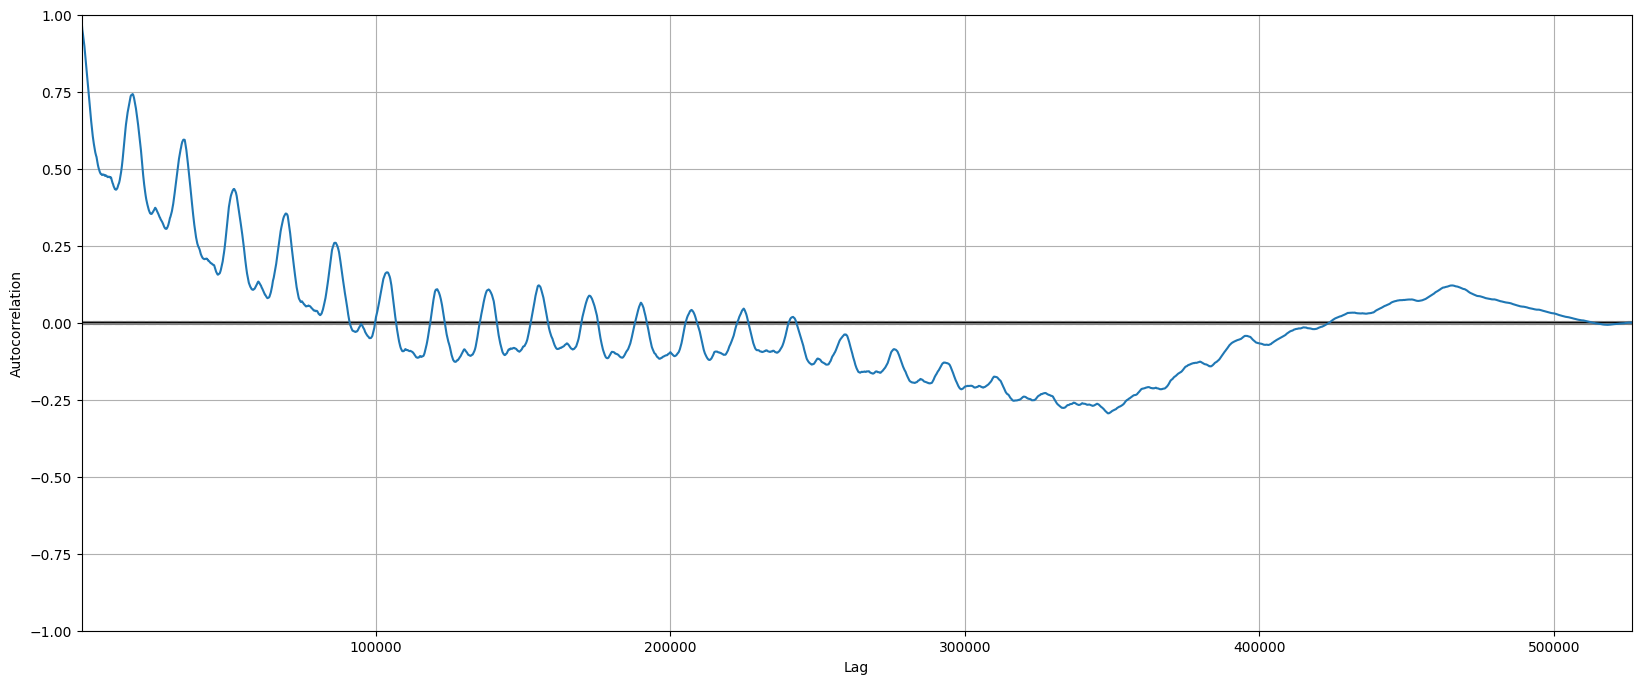

In [86]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize = (20,8))
autocorrelation_plot(new_df)
pyplot.show()